# Steel Plates Fault Analysis
The goal of this document is to describe the approach used to analyse the dataset related to the Steel Plates Faults

The dataset includes 1941 observations, and 27 features. The data is already labeled, and there are 7 types of steel plate faults that are added to the dataset as 7 fields representing the one-hot-encoding of the label.

# The Analysis
I am going to start by importing the relevant libraries and the dataset. Here Numpy and Pandas libraries are used for computations and handling the dataset. Scikit-Learn has been utilized for the machine learning methods that are used for analyzing the data, and Scipy has provided some more advanced statistical tools that were needed for this analysis.

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy import stats
from scipy.stats import norm, skew

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('faults.csv')


In [70]:
data.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Target                   0
dtype: int64

from the above output we can say that we have no missing value so there is no need to do the fixing for missing values.
to analyse every features let's analyse first five rows of dataset

In [3]:
data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1                    123  ...             0.7931           -0.1756   
2                    125  ...             0.6667           -0.1228   
3                    126  ...             0.8444           -0.1568   
4                    126  ...             0.9338           -0.1992   

   SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
0          0.5822       1          0         0       0          0      0   
1          0.2984       1          0         0       0          0      0   
2          0.2150       1          0         0       0          0      0   
3          0.5212       1          0         0       0          0      0   
4          1.0000       1          0         0       0          0      0   

   Other_Faults  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [4]:
data.shape

(1941, 34)

In [5]:
data.describe()

X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879       5.122936e+05              32.134276   
min        2.000000      1.000000       2.500000e+02               0.000000   
25%       15.000000     13.000000       9.522000e+03              63.000000   
50%       26.000000     25.000000       1.920200e+04              90.000000   
75%       84.000000     83.000000       8.301100e+04             106.000000   
max    10449.000000  18152.000000       1.159141e+07             203.000000   

       Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
count            1941.000000  ...        1941.000000       1941.000000   
mean              130.193715  ...           0.083288         -0.131305   
std                18.690992  ...           0.500868          0.148767   
min                37.000000  ...          -0.991000         -0.998900   
25%               124.000000  ...          -0.333300         -0.195000   
50%               127.000000  ...           0.095200         -0.133000   
75%               140.000000  ...           0.511600         -0.066600   
max               253.000000  ...           0.991700          0.642100   

       SigmoidOfAreas       Pastry    Z_Scratch     K_Scatch       Stains  \
count     1941.000000  1941.000000  1941.000000  1941.000000  1941.000000   
mean         0.585420     0.081401     0.097888     0.201443     0.037094   
std          0.339452     0.273521     0.297239     0.401181     0.189042   
min          0.119000     0.000000     0.000000     0.000000     0.000000   
25%          0.248200     0.000000     0.000000     0.000000     0.000000   
50%          0.506300     0.000000     0.000000     0.000000     0.000000   
75%          0.999800     0.000000     0.000000     0.000000     0.000000   
max          1.000000     1.000000     1.000000     1.000000     1.000000   

         Dirtiness        Bumps  Other_Faults  
count  1941.000000  1941.000000   1941.000000  
mean      0.028336     0.207110      0.346728  
std       0.165973     0.405339      0.476051  
min       0.000000     0.000000      0.000000  
25%       0.000000     0.000000      0.000000  
50%       0.000000     0.000000      0.000000  
75%       0.000000     0.000000      1.000000  
max       1.000000     1.000000      1.000000  

[8 rows x 34 columns]

To use the data, I will drop the one-hot encoding of the types and add a single Target column with the fault type names:

In [6]:
targets = data.iloc[:, 27:35]
data.drop(targets.columns, axis=1, inplace=True)
data['Target'] = targets.idxmax(1)
data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0                    108  ...         0.4706         1.0000   
1                    123  ...         0.6000         0.9667   
2                    125  ...         0.7500         0.9474   
3                    126  ...         0.5385         1.0000   
4                    126  ...         0.2833         0.9885   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.4265       0.9031       1.6435   
1                   1.0      2.0334       0.7782       1.4624   
2                   1.0      1.8513       0.7782       1.2553   
3                   1.0      2.2455       0.8451       1.6532   
4                   1.0      3.3818       1.2305       2.4099   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Target  
0             0.8182           -0.2913          0.5822  Pastry  
1             0.7931           -0.1756          0.2984  Pastry  
2             0.6667           -0.1228          0.2150  Pastry  
3             0.8444           -0.1568          0.5212  Pastry  
4             0.9338           -0.1992          1.0000  Pastry  

[5 rows x 28 columns]

In [7]:
origina_data = data.copy()

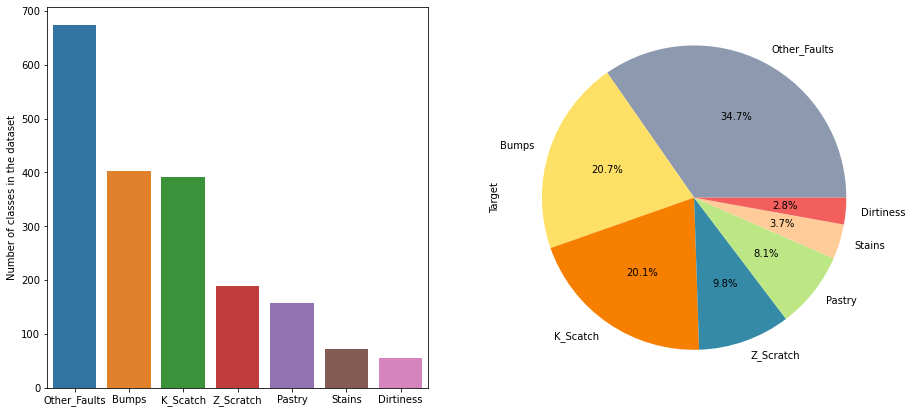

In [8]:
target_counts= data['Target'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15,7))
target_counts_barplot = sns.barplot(x = target_counts.index,y = target_counts.values, ax = ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset')

colors = ['#8d99ae','#ffe066', '#f77f00','#348aa7','#bce784','#ffcc99',  '#f25f5c']
target_counts.plot.pie(autopct="%1.1f%%", ax=ax[1], colors=colors);

There are 7 fault classes as follows: Dirtiness, Stains, Pastry, Z_Scratch, K_Scratch, Bumps, and Other_Faults.

It can be seen that there are many observations (34.7%) that are labeled as Other_Faults. And besides Bumps, and k_Scatch that cover considerable number of observations, other fault types do not have very high number of observations. This shows that in this set of observations the other four fault types do not accure often. However, this might cause an issue as classification methods might not perform well in recognizing the less populated faults. Therefore, a balanced sampling method might provide some improvements in the performance of the classification method. However, it should be studied and tested to give a final opinion.

In [69]:
#sns.pairplot(data, hue='Target')

In [9]:
data['TypeOfSteel_A300'] = data['TypeOfSteel_A300'].astype('category',copy=False)
data['TypeOfSteel_A400'] = data['TypeOfSteel_A400'].astype('category',copy=False)
data['Outside_Global_Index'] = data['Outside_Global_Index'].astype('category',copy=False)

<AxesSubplot:>

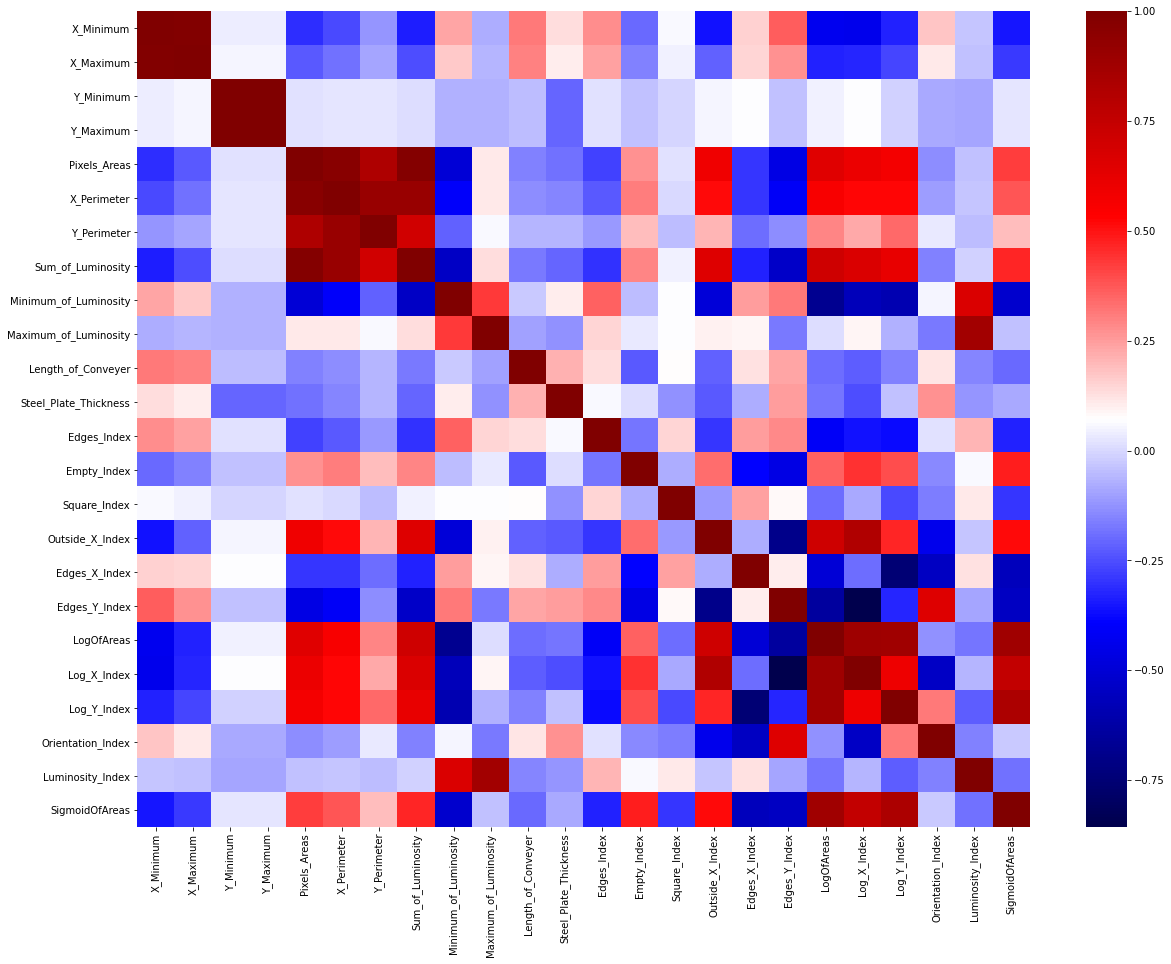

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), cmap='seismic')

From the heatmap, it can be seen that there are some features that are highly correlated (shown in dark red for positive correlation and dark blue for negative correlation), with each other and cannot be considered as indipendent variables that we need for modeling. The features with white or very light colors however, can be condidered as indipendent. Let's examine some of the examples of correlated features below:

<AxesSubplot:xlabel='X_Minimum', ylabel='X_Maximum'>

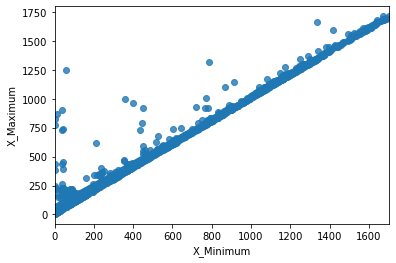

In [11]:
sns.regplot(x='X_Minimum', y='X_Maximum', data = data, scatter = True)

<AxesSubplot:xlabel='Pixels_Areas', ylabel='Sum_of_Luminosity'>

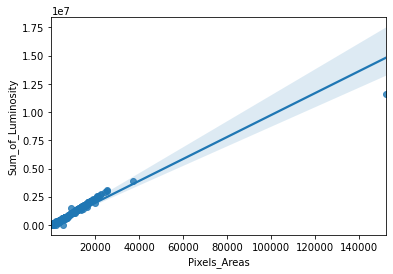

In [12]:
sns.regplot(x='Pixels_Areas', y='Sum_of_Luminosity', data = data, scatter = True)

<AxesSubplot:xlabel='Maximum_of_Luminosity', ylabel='Luminosity_Index'>

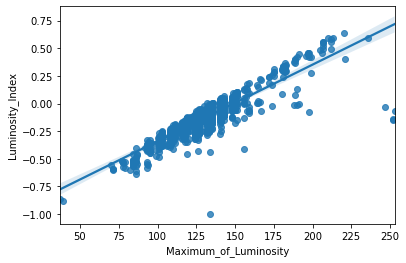

In [13]:
sns.regplot(x='Maximum_of_Luminosity', y='Luminosity_Index', data = data, scatter = True)

<AxesSubplot:xlabel='Edges_Y_Index', ylabel='Log_X_Index'>

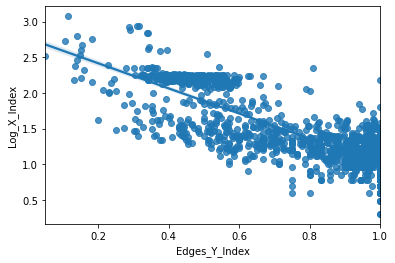

In [14]:
sns.regplot(x='Edges_Y_Index', y='Log_X_Index', data = data, scatter = True)

The linear relationship between the two features shows their correlation. To resolve this issue the Principal Component Analysis (PCA) method might come handy to produce the independent components.

# Feature Skewness
When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics).

If the dataset is skewed, then the Machine Learning model wouldn’t be able to do a good job on predictions. To resolve the issue of the skewed features we can apply the a log transform of the same data, or to use the Box-Cox Transformation. Let's see how skewed are our numerical features:

In [15]:
numeric_features = data.dtypes[data.dtypes != "object"].index

skewed_features = data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_features_df = pd.DataFrame(skewed_features, columns={'Skew'})
skewed_features_df.head(10)

Skew
Y_Perimeter            39.262786
X_Perimeter            21.522802
Pixels_Areas           14.072936
Sum_of_Luminosity       7.724744
Outside_X_Index         5.177825
Y_Minimum               2.809040
Y_Maximum               2.808996
Steel_Plate_Thickness   2.205229
Maximum_of_Luminosity   1.286041
Log_X_Index             1.000240

In [16]:
skewed_features_df.tail(10)

Skew
TypeOfSteel_A300       0.406934
Empty_Index            0.293241
SigmoidOfAreas         0.125691
Square_Index          -0.056262
Minimum_of_Luminosity -0.107015
Orientation_Index     -0.153327
Edges_X_Index         -0.234914
Outside_Global_Index  -0.306185
TypeOfSteel_A400      -0.406934
Edges_Y_Index         -0.927865

I remove our categorical features from the list before applying the Box-Cox transformation:

In [17]:
skewed_features_df.drop(['TypeOfSteel_A400','TypeOfSteel_A300', 'Outside_Global_Index'], inplace=True)

From what we can see, there are many features that are skewed, therefore, a method to resolve this issue might provide better performances in many of the models that would be applied on this dataset. Let's see one of the skewed features and compare the results after applying the Box-Cox Transformation:

<AxesSubplot:xlabel='Sum_of_Luminosity', ylabel='Density'>

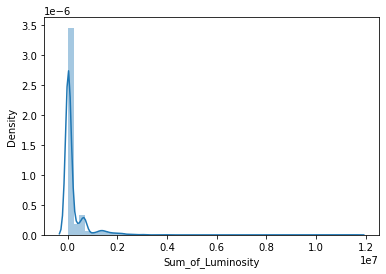

In [18]:
sns.distplot(data['Sum_of_Luminosity'])

Now I apply the Box-Cox transformation that is available in scipy special module:

In [19]:
skewed_features_df = skewed_features_df[abs(skewed_features_df) > 0.75]

from scipy.special import boxcox1p
lam = 0.15
cols = skewed_features_df.index

for c in cols:
    data[c] = boxcox1p(data[c], lam)

<AxesSubplot:xlabel='Sum_of_Luminosity', ylabel='Density'>

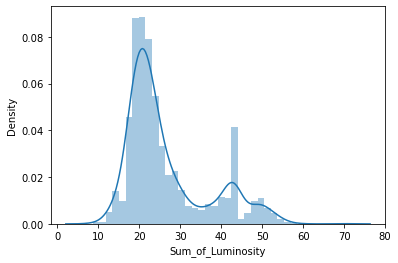

In [20]:
sns.distplot(data['Sum_of_Luminosity'])

It can be seen that the sample feature that we examined is now very close to a normal distribution.

# Scaling the Features
In many models the features need to be scaled for the model to perform well. Features with high values may effect the performance of many models. I will first separate the features and the target from our dataset and then apply the standard scaler on the features:

In [21]:
features = data.drop('Target', axis=1)
target = data['Target']

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Outlier Analysis
From the pairplot that was examined previously, I also noticed many outliers. There are basically three types of outliers:

Point Outliers: observations anomalous with respect to the majority of observations in a feature (aka univariate outlier).
Contextual Outliers: observations considered anomalous given a specific context.
Collective Outliers: a collection of observations anomalous but appear close to one another because they all have a similar anomalous value.
In what follows I try to analyse the outliers and remove them if possible.

Univariate Method:
Tukey Boxplot is used to detect unusually high or low data points, which can be considered as potential outliers to be investigated further. Even if it would be very crowded, I would like to take a look of the boxplot of the all features to get an idea about how many outliers we are talking about:

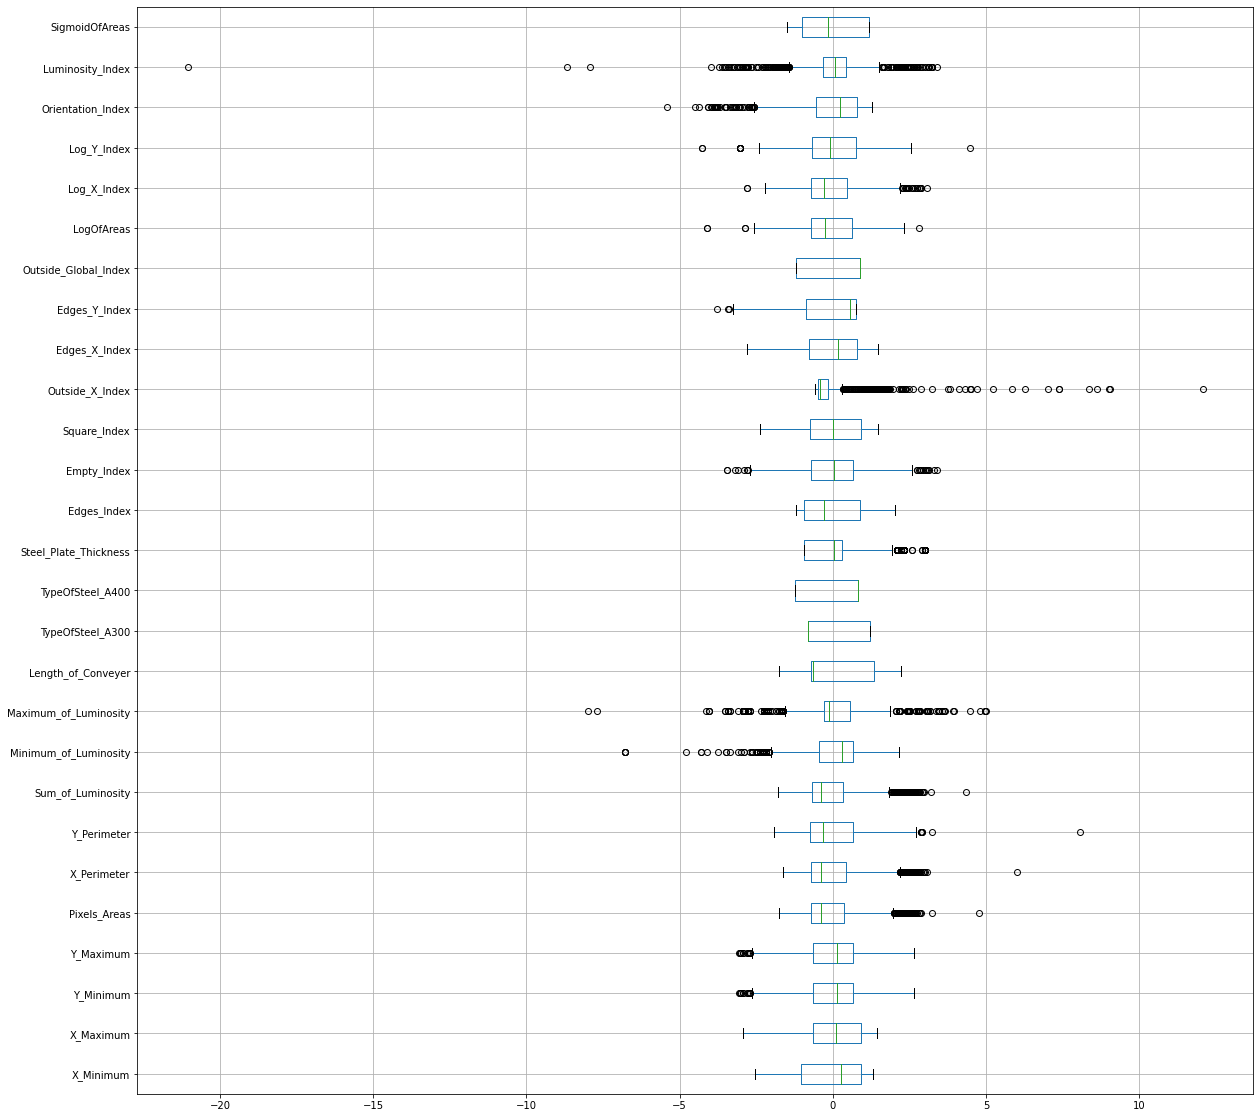

In [22]:
data_boxplot = features_scaled.boxplot(return_type='dict', vert=False, figsize=(20,20))

It seems that there are many outliers in different features that is expected as we are looking at the fault data. However, the outliers should be studied, and if they are real outliers they should be removed. Let's first look at the extreme outliers:

In [23]:
features_scaled[features_scaled['Pixels_Areas']>4]

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
391  -1.480626  -0.753254    1.34255    1.34719      4.781174     6.014558   

     Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
391     8.086639           4.365205              -6.772315   

     Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
391               1.356452  ...         1.453717      -2.803648   

     Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
391       0.771152              0.879804    2.829885       1.7046   

     Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
391     4.479892           1.267008         -1.785098        1.189773  

[1 rows x 27 columns]

In [24]:
features_scaled[features_scaled['Sum_of_Luminosity']>4]

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
391  -1.480626  -0.753254    1.34255    1.34719      4.781174     6.014558   

     Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
391     8.086639           4.365205              -6.772315   

     Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
391               1.356452  ...         1.453717      -2.803648   

     Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
391       0.771152              0.879804    2.829885       1.7046   

     Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
391     4.479892           1.267008         -1.785098        1.189773  

[1 rows x 27 columns]

In [25]:
features_scaled[features_scaled['X_Perimeter']>4]

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
391  -1.480626  -0.753254    1.34255    1.34719      4.781174     6.014558   

     Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
391     8.086639           4.365205              -6.772315   

     Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
391               1.356452  ...         1.453717      -2.803648   

     Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
391       0.771152              0.879804    2.829885       1.7046   

     Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
391     4.479892           1.267008         -1.785098        1.189773  

[1 rows x 27 columns]

It seems that these outliers are related to the same observations. This is not very suprising as we have seen previously that these 4 features are highly correlated.

The univariate study shows that there are many outliers, however, more study is required to decide how to manage them. Therefore, it should be taken into consideration in a more thorough analysis.

# Multivariate Method
I would also like to do a multivariate analysis to reveal the outliers in the features with regards to the target classes.

To go forward with the analysis, I create the scaled dataset from the scaled features and I add the target, and also a numeric code to represent the target class:

In [26]:
data_scaled = features_scaled.copy()
data_scaled['Target'] = target

data_scaled['Target'] = pd.Categorical(data_scaled['Target'])
data_scaled['Target_Code'] = data_scaled.Target.cat.codes

After some try and error I selected some boxplots that will give some information about the amount of outliers that we are facing:

<AxesSubplot:xlabel='Target', ylabel='X_Maximum'>

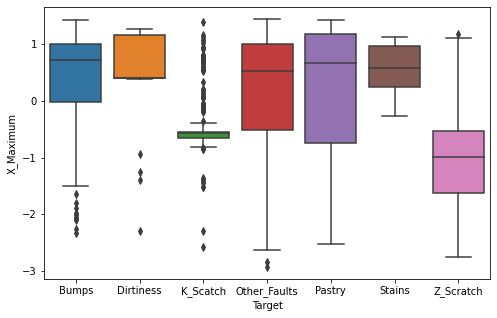

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='X_Maximum', data=data_scaled)

<AxesSubplot:xlabel='Target', ylabel='Steel_Plate_Thickness'>

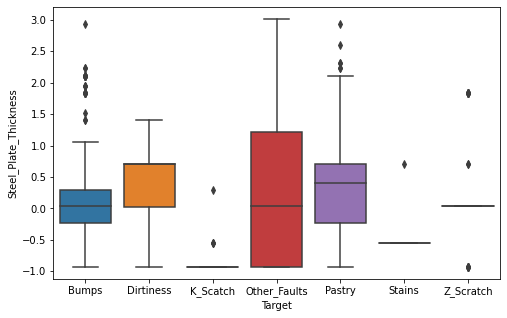

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='Steel_Plate_Thickness', data=data_scaled)

<AxesSubplot:xlabel='Target', ylabel='Luminosity_Index'>

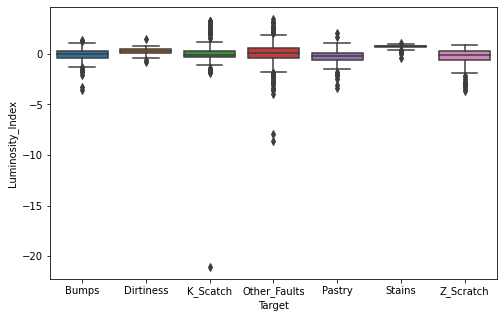

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='Luminosity_Index', data=data_scaled)

<AxesSubplot:xlabel='Target', ylabel='Square_Index'>

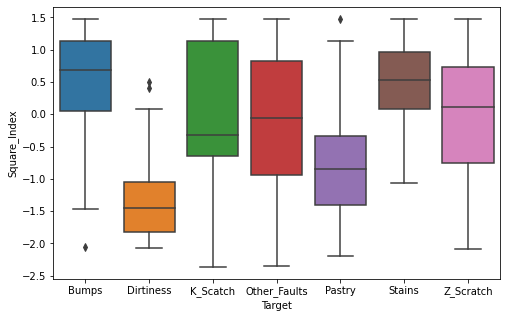

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='Square_Index', data=data_scaled)

<AxesSubplot:xlabel='Target', ylabel='Edges_Index'>

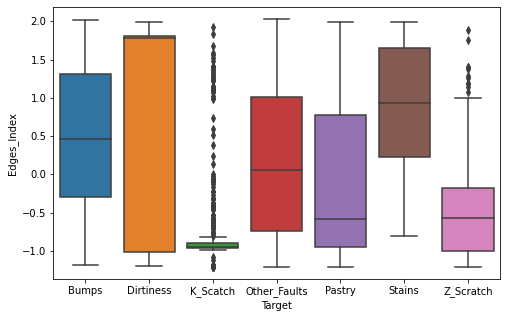

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='Edges_Index', data=data_scaled)

<AxesSubplot:xlabel='Target', ylabel='LogOfAreas'>

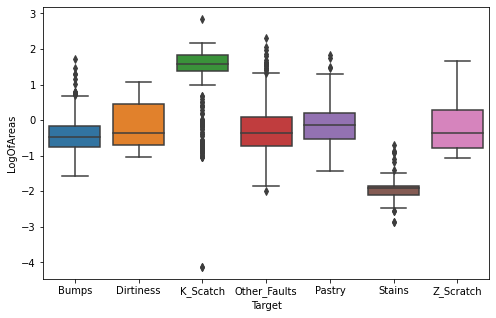

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='LogOfAreas', data=data_scaled)

<AxesSubplot:xlabel='Target', ylabel='Y_Maximum'>

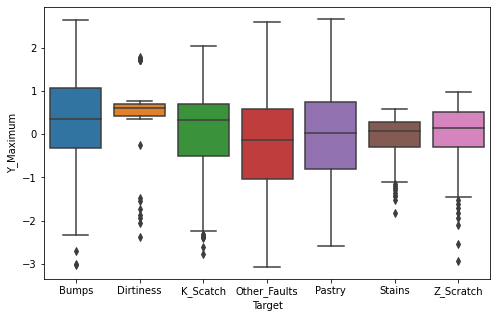

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='Y_Maximum', data=data_scaled)

<AxesSubplot:xlabel='Target', ylabel='Orientation_Index'>

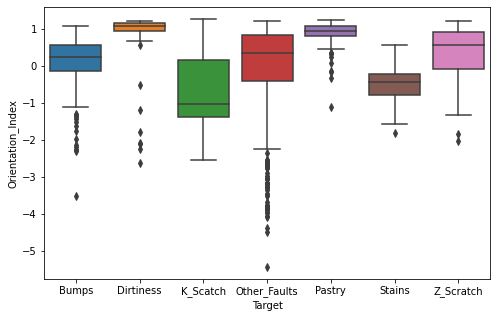

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='Orientation_Index', data=data_scaled)


<AxesSubplot:xlabel='Target', ylabel='Minimum_of_Luminosity'>

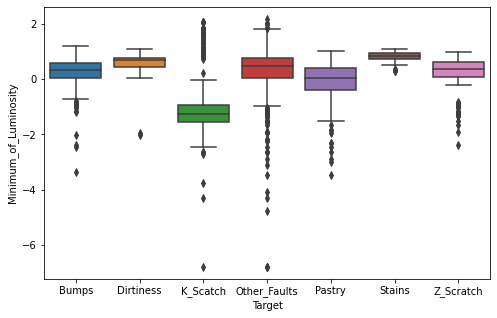

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='Minimum_of_Luminosity', data=data_scaled)


<AxesSubplot:xlabel='Target', ylabel='Length_of_Conveyer'>

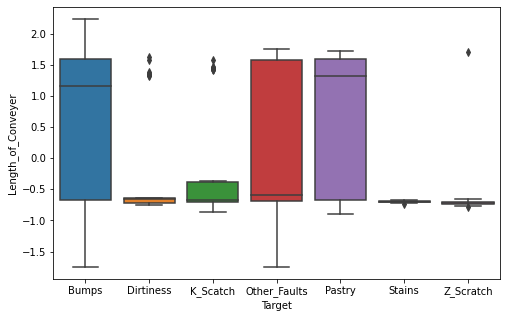

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Target', y='Length_of_Conveyer', data=data_scaled)

As it can be seen in the plots, there are many outliers, including some very extreme ones that would reduce the performance of the models. As in the data documentations there aren't enough information on the features and it is not possible to examine the outliers to decide which ones can be removed. In the following, I will use DBSCAN as a method to remove the outliers in a more automatic way:

# DBSCAN for Outlier Detection
DBSCAN is a unsupervised method that clusters core samples and denotes non-core samples. It can be used to identify collective outliers. I start from  eps=0.1  and increase it untill I arrive to maximum 5% of the dataset to be considered as outliers. eps is the maximum distance between two samples for them to be considered as in the same neighborhood. I also play with the _minsamples parameter which defiens the minimum number of the samples in a cluster.

In [38]:
dbscan_model = DBSCAN(eps=3.3, min_samples=7).fit(features_scaled)

In [39]:
print(Counter(dbscan_model.labels_))

Counter({0: 1846, -1: 95})


Here the DBSCAN has found 95 outliers which is about 4.89% of our dataset which is acceptable as we should remain under 5% when detecting the outliers. This is not the optimal output that was expected, as it wasn't possible to detect more clusters and there was always too many observations considered as outliers.

As there aren't any other information to decide about the outliers I will simply drop the outliers from the dataset:

In [40]:
outliers = features_scaled[dbscan_model.labels_ == -1]
outliers.shape

(95, 27)

In [41]:
features_scaled.drop(outliers.index, axis=0, inplace=True)
target.drop(outliers.index, axis=0, inplace=True)
data_scaled.drop(outliers.index, axis=0, inplace=True)
features_scaled.shape

(1846, 27)

# Principal Component Analysis
As it has been discusssed before, there are many correlated variables in the dataset. Therefore, PCA might help in creating independent components that can be used in the final models.

Here I try to run the PCA to create components representing all the features. I will use this to select the right number of components that better represent the variation in the dataset:

In [42]:
pca = PCA(random_state=101)
features_pca = pca.fit_transform(features_scaled.values)
pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance Ratio'])

Explained Variance Ratio
0               3.978569e-01
1               1.231157e-01
2               1.029524e-01
3               7.205521e-02
4               6.475156e-02
5               5.167241e-02
6               4.501012e-02
7               3.567701e-02
8               2.371999e-02
9               2.153396e-02
10              1.906597e-02
11              1.215045e-02
12              1.066617e-02
13              8.208449e-03
14              4.670347e-03
15              2.857887e-03
16              1.537648e-03
17              9.075729e-04
18              7.587389e-04
19              3.138498e-04
20              2.731257e-04
21              1.597247e-04
22              6.119482e-05
23              2.072687e-05
24              2.884543e-06
25              2.444566e-10
26              1.706365e-33

In [43]:
pca.explained_variance_ratio_[0:15].sum()

0.9931066464659039

It seems that we can explain the 99% of the variability in the data set using the first 15 components from the PCA.

Let's see how the PCA components correlate with our featuers:

<AxesSubplot:>

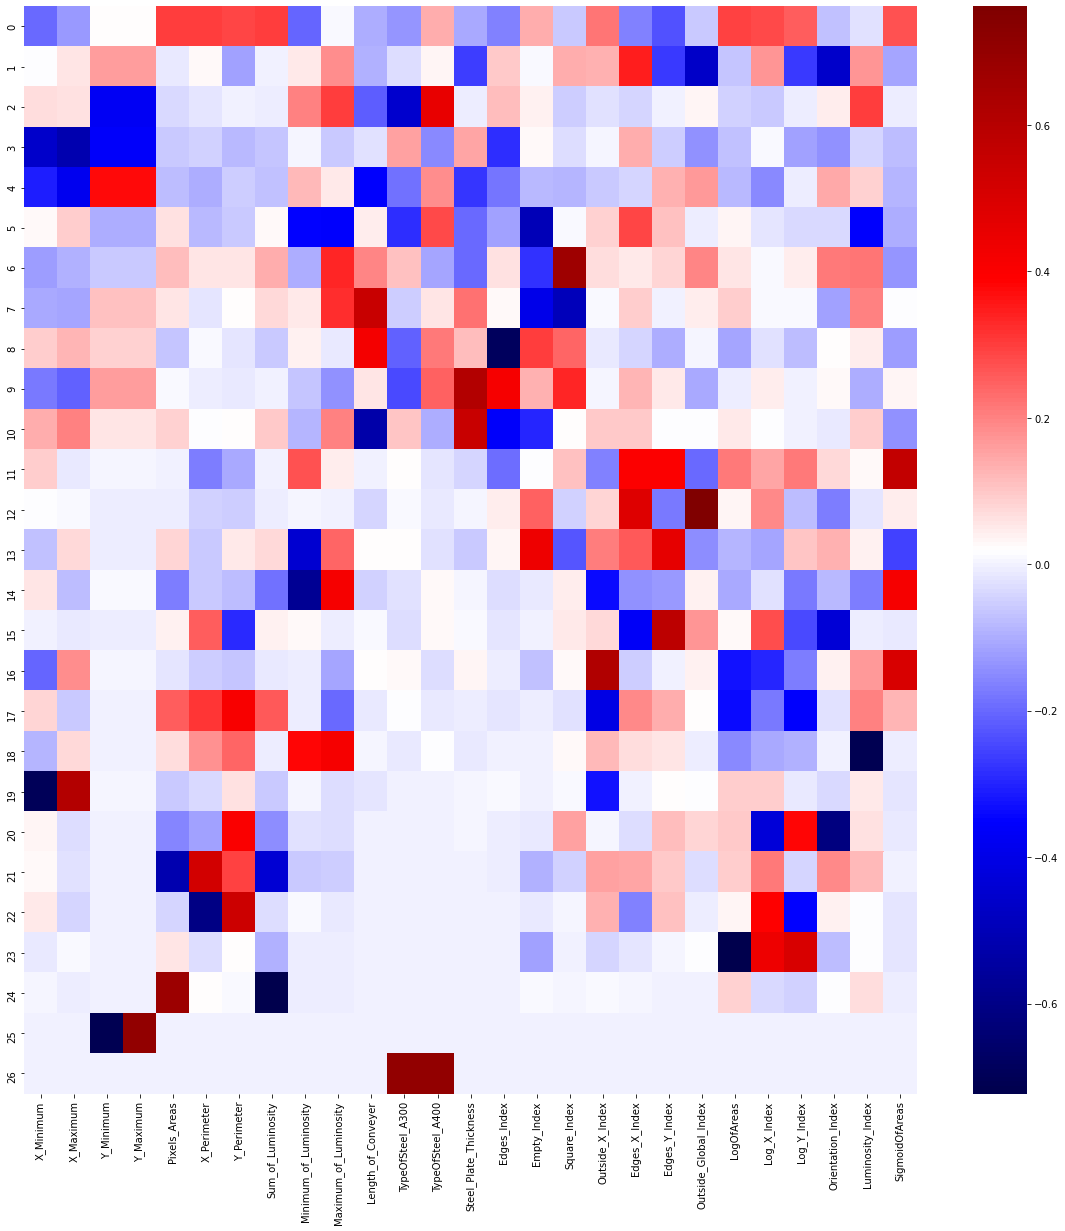

In [44]:
pca_components = pd.DataFrame(pca.components_, columns= features.columns)
plt.figure(figsize=(20,20))
sns.heatmap(pca_components, cmap='seismic')

Now I choose the number of components to 15, and run the PCA again to create the PCA components:

In [45]:
def pca_dataset(features, n_components):
    
    pca_n = PCA(n_components=n_components, random_state=101)
    features_pca_n = pca_n.fit_transform(features)
    
    column_pca = []
    for i in range(0,n_components):
        column_pca.append('Component'+np.str(i))
    return pd.DataFrame(features_pca_n, columns=column_pca)

I create the dataset based on the results, I simply call the columns 'Component0'...'Component14':

In [46]:
data_pca15 = pca_dataset(features_scaled, n_components=15)
data_pca15['Target'] = target

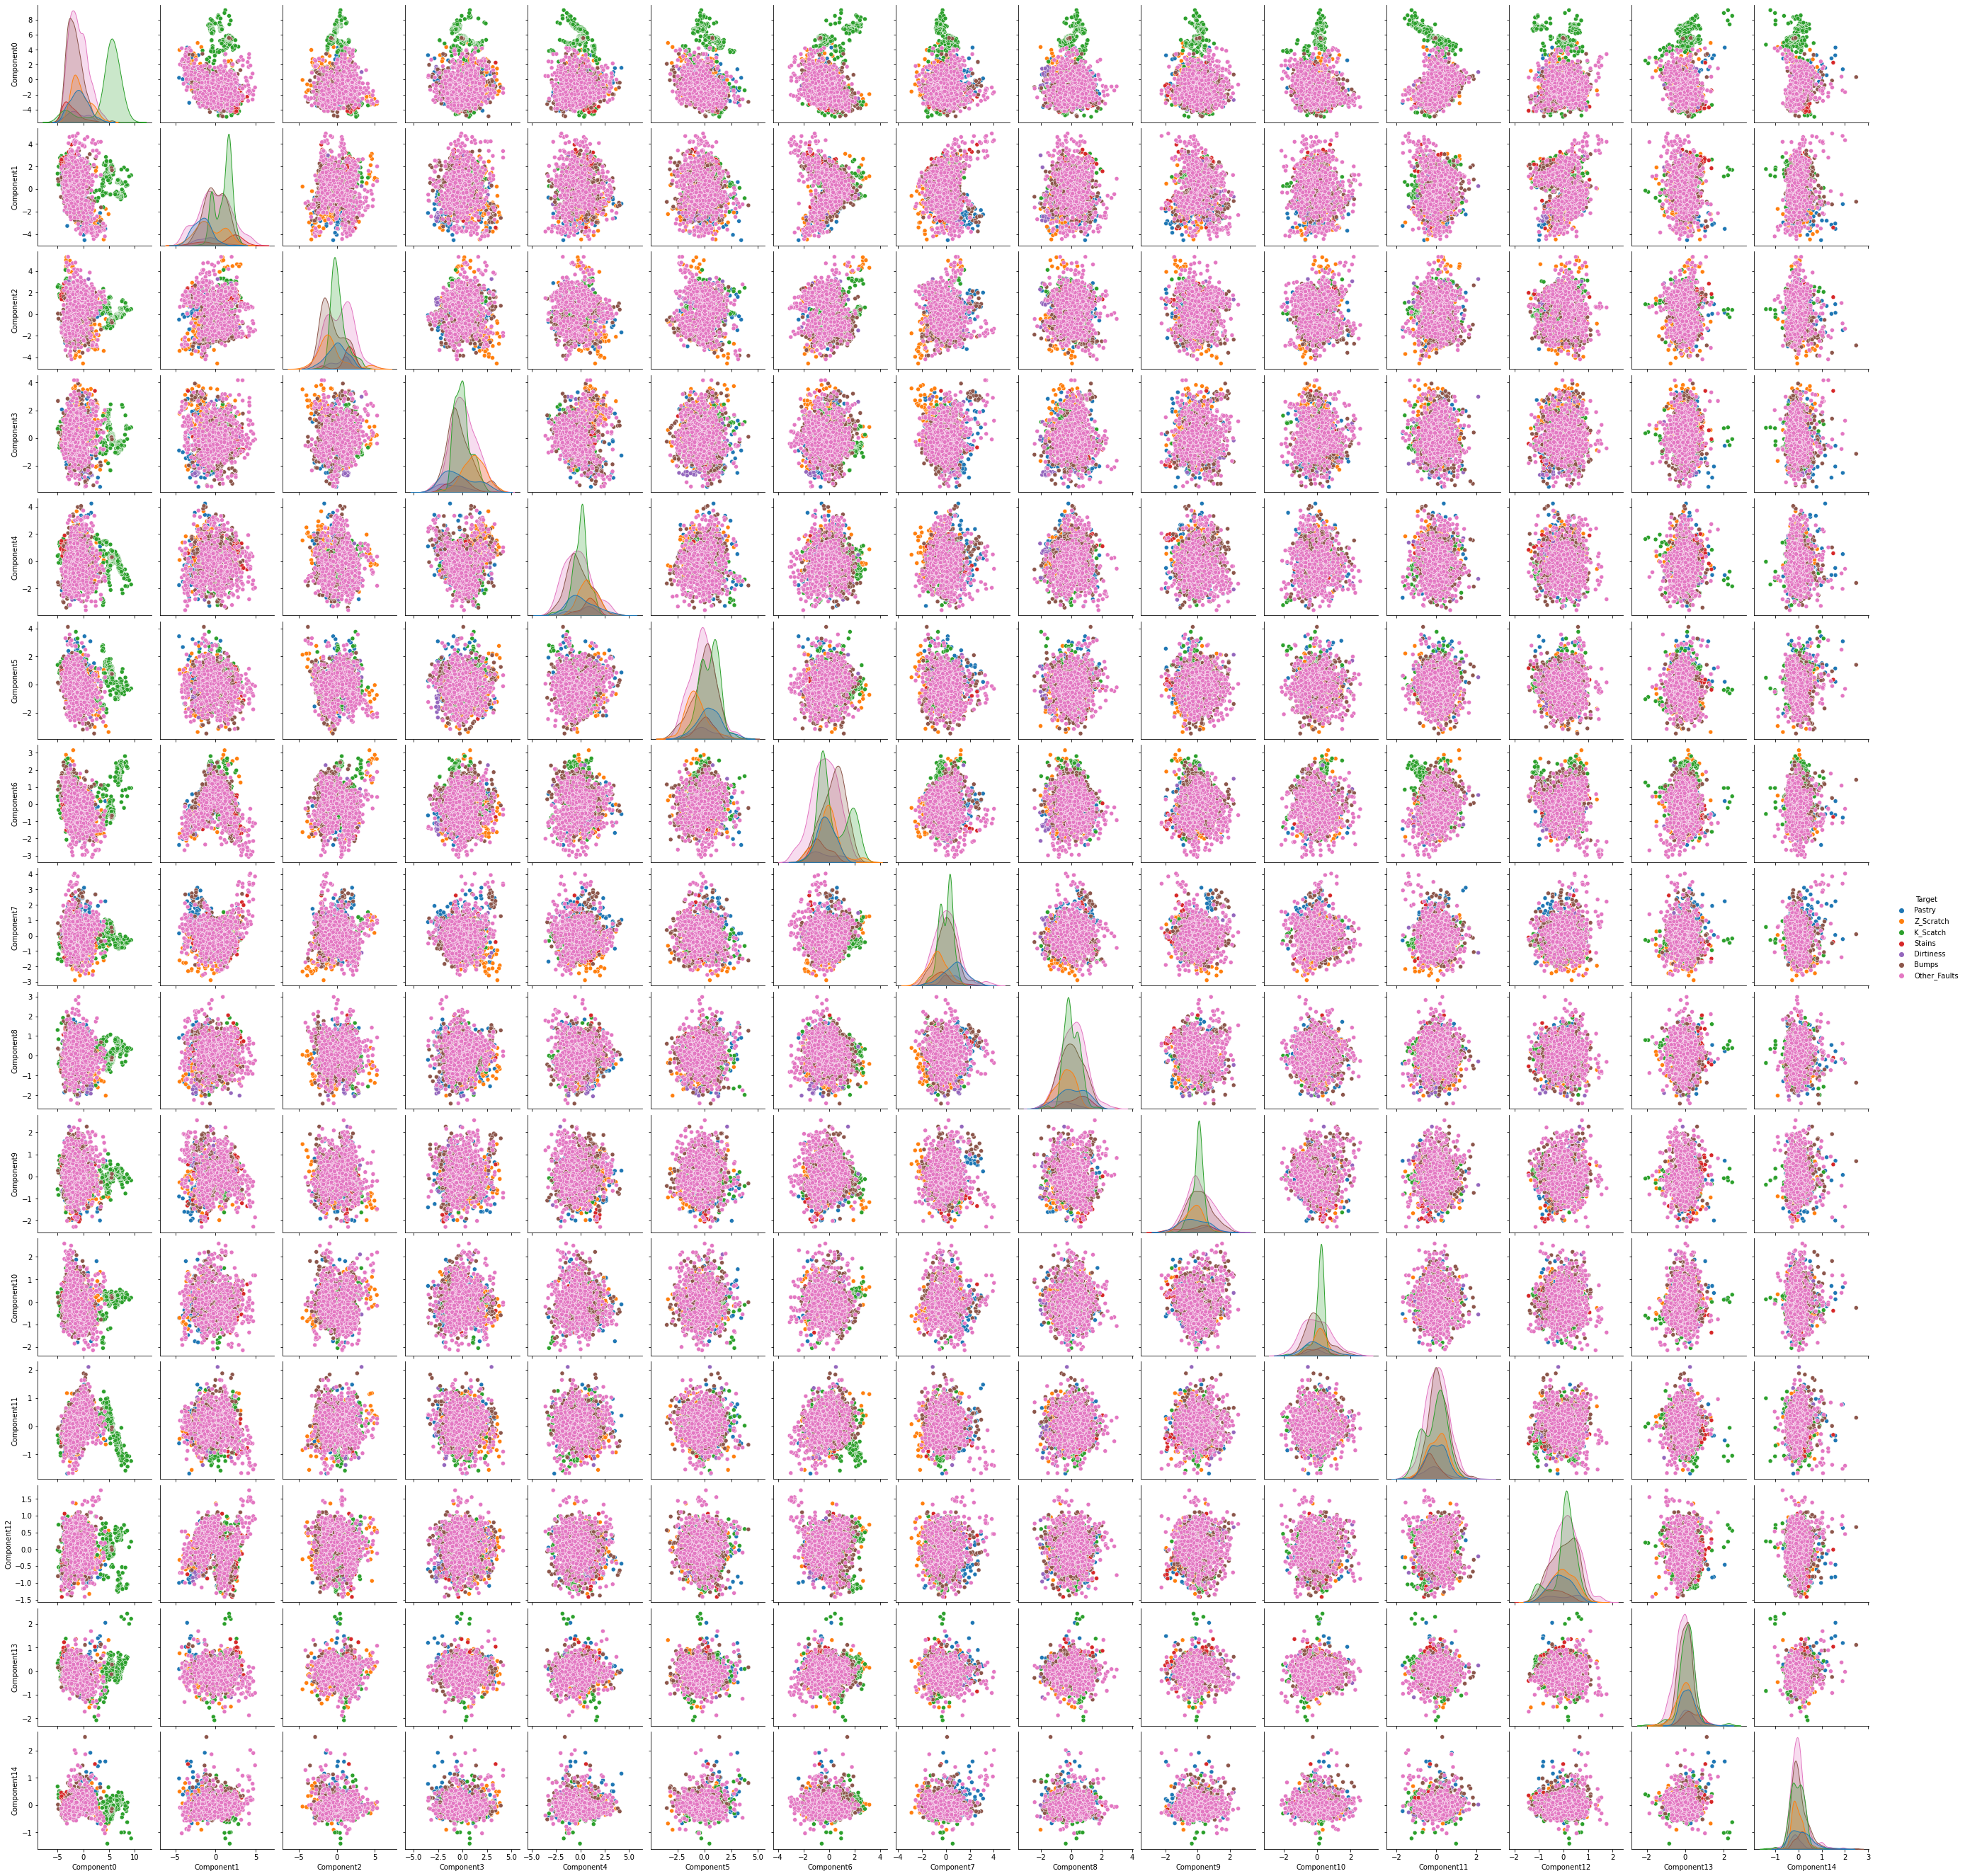

In [47]:
sns.pairplot(data_pca15, hue='Target')

Here we can see the components are mutually independent from one another. However, still it seems like the last components do not play an important role in separating the classes. I will also create another dataset using only 5 components that make up to the 76% variability as can be seen below:



In [48]:
pca.explained_variance_ratio_[0:5].sum()

0.7607317672293301

In [49]:
data_pca5 = pca_dataset(features_scaled, n_components=5)
data_pca5['Target'] = target

In [50]:
data_pca15['Target'] = pd.Categorical(data_pca15['Target'])
data_pca15['Target_Code'] = data_pca15.Target.cat.codes

data_pca5['Target'] = pd.Categorical(data_pca5['Target'])
data_pca5['Target_Code'] = data_pca5.Target.cat.codes

# Cluster Analysis
Grouping with K-Means Clustering
The K-Means clustering algorithm is a simple unsupervised algorithm that's used for quickly predicting groupings.

Now let's take a look at the groups that we can identify by K-Means. We already know that we have 7 types of fault. Therefore, we can consider the number of clusters to be 7.

In [51]:
kmeans_model = KMeans(n_clusters=7, random_state=54)
kmeans_model.fit(features_scaled)

KMeans(n_clusters=7, random_state=54)

To see the results, I will choose one example features and we can compare how the ground truth classification (with the labels) will compare to the clusters that are recognized with the K-Means:

In [52]:
kmeans_labels = np.choose(kmeans_model.labels_, [0,1,2,3,4,5,6]).astype(np.int64)
data_scaled['kmeans_labels'] = kmeans_labels

Text(0.5, 1.0, 'KMean Clustering')

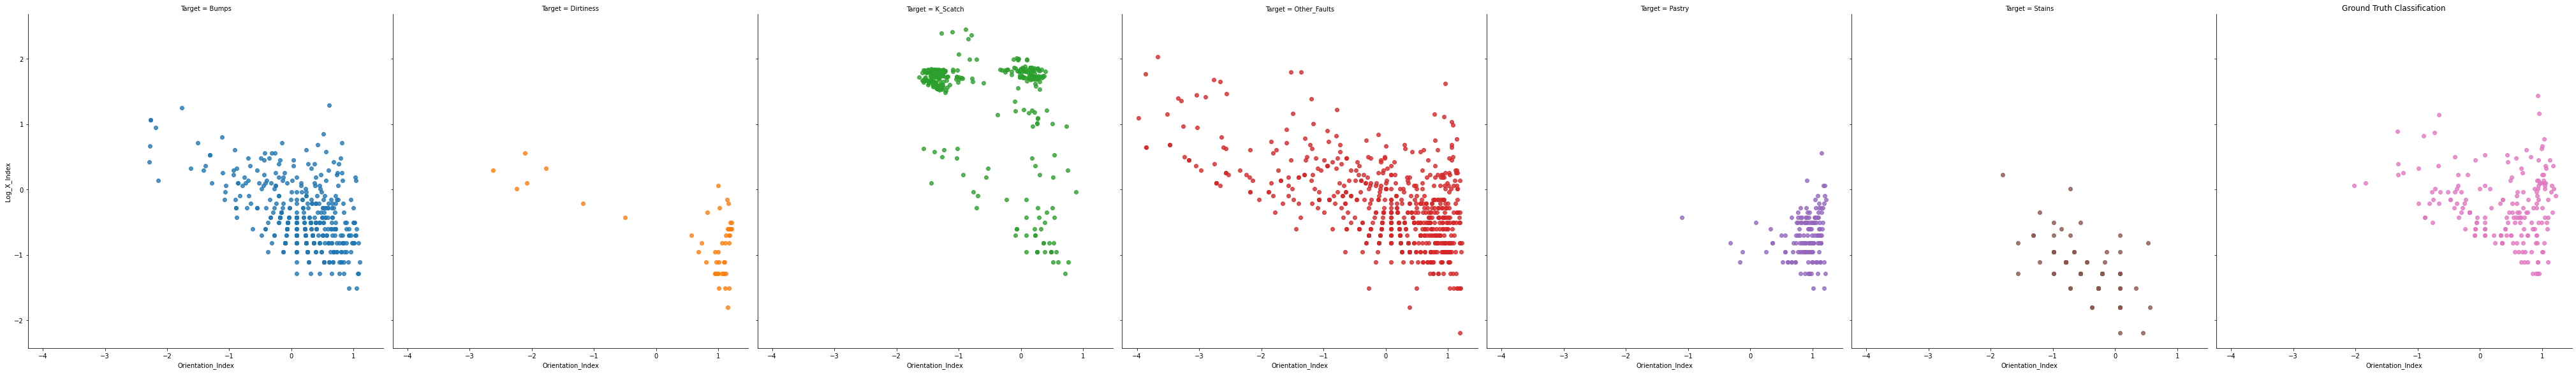

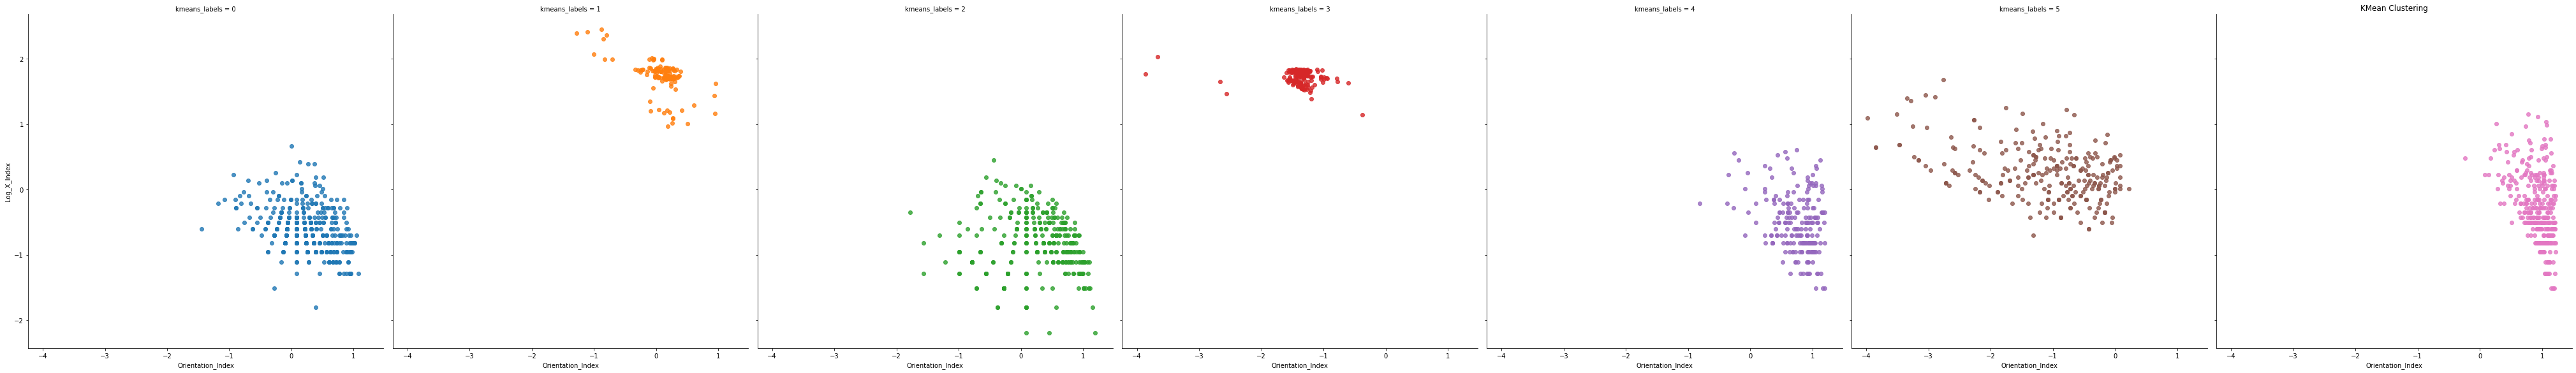

In [54]:
color_themes = {0:'#8d99ae',1:'#ffe066', 2:'#f77f00',3:'#348aa7',4:'#bce784',5:'#ffcc99',  6:'#f25f5c'}


sns.lmplot(x='Orientation_Index', y='Log_X_Index', data=data_scaled, fit_reg=False, hue='Target', col='Target', size=8)
plt.title("Ground Truth Classification")

sns.lmplot(x='Orientation_Index', y='Log_X_Index', data=data_scaled,  fit_reg=False, hue='kmeans_labels', col='kmeans_labels',size=8)
plt.title("KMean Clustering")

From this example we can see that K-Means could some how find the right clusters however it doesn't seem close enough. Let's look at the classification metrics to get a more detailed evaluation:

In [55]:
print(classification_report(data_scaled['Target_Code'], kmeans_labels))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51       396
           1       0.00      0.00      0.00        53
           2       0.11      0.10      0.10       374
           3       0.04      0.01      0.02       615
           4       0.14      0.19      0.16       149
           5       0.02      0.07      0.03        72
           6       0.09      0.14      0.11       187

    accuracy                           0.17      1846
   macro avg       0.13      0.15      0.13      1846
weighted avg       0.16      0.17      0.16      1846



As the results show the precision and recall suffer, and K-Means is not able to cluster the data accurately. Let's try the same approach using the 15 PCA components that we selected:

In [56]:
kmeans_model_pca15 = KMeans(n_clusters=7, random_state=54)
kmeans_model_pca15.fit(data_pca15.drop(['Target','Target_Code'], axis=1))

KMeans(n_clusters=7, random_state=54)

In [57]:
kmeans_labels_pca15 = np.choose(kmeans_model.labels_, [0,1,2,3,4,5,6]).astype(np.int64)
data_pca15['kmeans_labels'] = kmeans_labels_pca15

Text(0.5, 1.0, 'KMean Clustering')

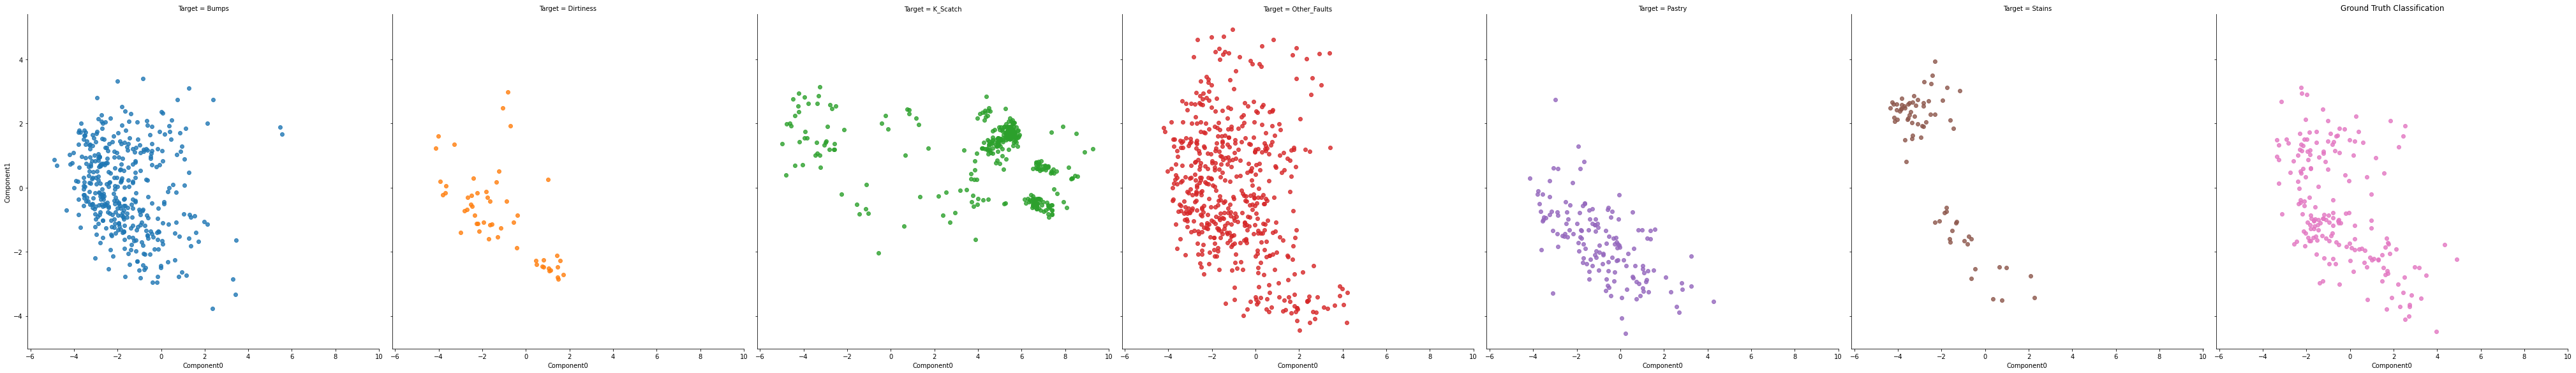

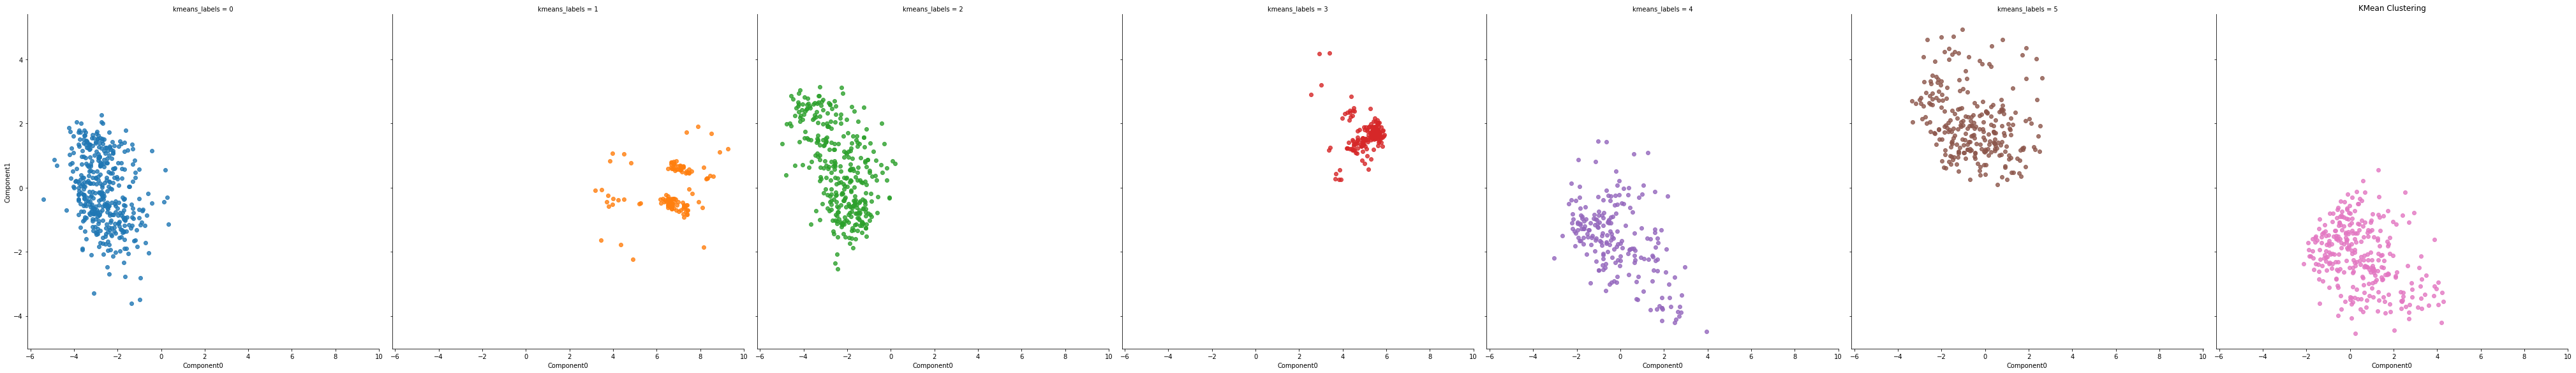

In [58]:
sns.lmplot(x='Component0', y='Component1', data=data_pca15, fit_reg=False, hue='Target', col='Target', size=8)
plt.title("Ground Truth Classification")

sns.lmplot(x='Component0', y='Component1', data=data_pca15,  fit_reg=False, hue='kmeans_labels', col='kmeans_labels',size=8)
plt.title("KMean Clustering")

In [59]:
print(classification_report(data_pca15['Target_Code'], kmeans_model_pca15.labels_))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        91
           0       0.21      0.18      0.19       396
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00       374
           3       0.51      0.26      0.34       524
           4       0.22      0.46      0.30       149
           5       0.00      0.00      0.00        72
           6       0.41      0.45      0.43       187

    accuracy                           0.19      1846
   macro avg       0.17      0.17      0.16      1846
weighted avg       0.25      0.19      0.21      1846



It can be seen from the results that the 15 PCA components have led to much better precision and recall in K-Means. Let's also try with the 5 PCA components:



In [60]:
kmeans_model_pca5 = KMeans(n_clusters=7, random_state=54)
kmeans_model_pca5.fit(data_pca5.drop(['Target','Target_Code'], axis=1))

KMeans(n_clusters=7, random_state=54)

In [61]:
print(classification_report(data_pca5['Target_Code'], kmeans_model_pca15.labels_))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        91
           0       0.21      0.18      0.19       396
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00       374
           3       0.51      0.26      0.34       524
           4       0.22      0.46      0.30       149
           5       0.00      0.00      0.00        72
           6       0.41      0.45      0.43       187

    accuracy                           0.19      1846
   macro avg       0.17      0.17      0.16      1846
weighted avg       0.25      0.19      0.21      1846



We can see the using the 5 PCA components we arrive at the same results. Therefore, it can be considered to use less components would not impact the performance of the model negatively. Let's now try another clustering method that might lead to better results compared to K-Means:

# Hierarchical Clustering Method
Hierarchical clustering methods predict subgroups within data by finding the distance between each data point and its nearest neighbors. As we have irregular classes that are not normally distributed, this method might have an advantage to K-Means in producing more accurate clusters.

However, as the original shape of the distribution is important here and this model doesn't perform well on normal distributions, I will use the original dataset without the transformations and scaling for this model.

First, I use scipy yo generate dendograms:

In [62]:
original_features = origina_data.drop(['Target'], axis=1).copy()
origina_data['Target'] = pd.Categorical(origina_data['Target'])
origina_data['Target_Code'] = origina_data.Target.cat.codes

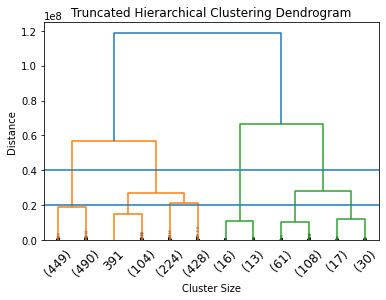

In [63]:
linkage_model = linkage(original_features, method='ward')
dendrogram(linkage_model, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=12, show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=0.4*10**(8))
plt.axhline(y=0.2*10**(8))

As it can be seen in the dendrogram, the closest that we can arrive to the desired 7 clusters is if we deside to have the distance around 0.2le8 which is quite strange. Let's see how the hierarchical clustering will perform here:

Generating hierarchical clusters

In [64]:
k = 7
h_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
h_clustering.fit(original_features)

accuracy_score(origina_data['Target_Code'], h_clustering.labels_)

0.2220504894384338

In [65]:
h_clustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='complete' )
h_clustering.fit(original_features)

accuracy_score(origina_data['Target_Code'], h_clustering.labels_)

0.09325090159711488

In [66]:
h_clustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
h_clustering.fit(original_features)

accuracy_score(origina_data['Target_Code'], h_clustering.labels_)

0.18341061308603812

After some try and error, it seems like the distance metric Euclidean and the linkage "Ward" work the best on our data, however, the results are still far from desired. Let's also use the PCA components and see if we can get better results:

In [67]:
k = 7
h_clustering_pca5 = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward' )
h_clustering_pca5.fit(data_pca5.drop(['Target','Target_Code'], axis=1))

accuracy_score(data_pca5['Target_Code'], h_clustering_pca5.labels_)

0.09750812567713976

# Conclusion:
Using the 5 selected components of the PCA method, it can be seen the results are far from satisfying.